<a href="https://colab.research.google.com/github/seoyun2/exploration/blob/main/Exploration2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploration 2

# Load Digits : Classification of Digits

## (1) Import the packages and load the datasets 

In [46]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

## (2) 데이터 살펴보기

In [47]:
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [48]:
digits_data = digits.data

digits_label = digits.target

print(digits_label[:20])
print(digits.DESCR)

[0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the n

In [49]:
print(digits_data.shape)
print(digits_label.shape)

(1797, 64)
(1797,)


## (3) Data split
모델 학습과 테스트용 문제지와 정답지 준비 

In [50]:
import pandas as pd
digits_df = pd.DataFrame(data = digits_data)
digits_df['label'] = digits_label
digits_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,16.0,14.0,12.0,16.0,3.0,0.0,0.0,4.0,16.0,6.0,3.0,16.0,4.0,0.0,0.0,0.0,12.0,16.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,4.0,4.0,16.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,5.0,0.0,0.0,0.0,5.0,7.0,7.0,16.0,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,16.0,15.0,12.0,16.0,1.0,0.0,0.0,3.0,16.0,7.0,0.0,13.0,6.0,0.0,0.0,4.0,16.0,0.0,0.0,10.0,8.0,0.0,0.0,8.0,16.0,0.0,0.0,14.0,6.0,0.0,0.0,5.0,16.0,7.0,9.0,16.0,5.0,0.0,0.0,1.0,15.0,16.0,16.0,16.0,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,13.0,16.0,8.0,2.0,1.0,0.0,0.0,0.0,16.0,15.0,10.0,16.0,5.0,0.0,0.0,0.0,8.0,16.0,16.0,7.0,0.0,0.0,0.0,0.0,9.0,16.0,16.0,4.0,0.0,0.0,0.0,0.0,16.0,14.0,16.0,15.0,0.0,0.0,0.0,0.0,15.0,15.0,15.0,16.0,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,14.0,16.0,16.0,15.0,1.0,0.0,0.0,4.0,16.0,7.0,3.0,16.0,7.0,0.0,0.0,5.0,16.0,10.0,7.0,16.0,4.0,0.0,0.0,0.0,5.0,14.0,14.0,16.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,2.0,0.0,0.0,0.0,4.0,7.0,7.0,16.0,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [51]:
X_train, X_test, y_train, y_test = train_test_split(digits_data, 
                                                   digits_label, 
                                                   test_size =  0.2,
                                                   random_state = 42)

print('X_train 개수 :', len(X_train), ', X_test 개수 :', len(X_test))

X_train 개수 : 1437 , X_test 개수 : 360


## (4) 다양한 모델로 학습시켜보기

### Decision Tree

In [52]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state = 42)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Decision Tree\'s accuracy : {:.3f}'.format(accuracy), '\n')

print('Decision Tree\'s report : \n\n', classification_report(y_test, y_pred), '\n')

print('Decision Tree\'s confusion matrix : \n\n',confusion_matrix(y_test, y_pred))

Decision Tree's accuracy : 0.842 

Decision Tree's report : 

               precision    recall  f1-score   support

           0       0.97      0.88      0.92        33
           1       0.85      0.79      0.81        28
           2       0.86      0.73      0.79        33
           3       0.76      0.85      0.81        34
           4       0.84      0.91      0.87        46
           5       0.89      0.85      0.87        47
           6       0.97      0.91      0.94        35
           7       0.82      0.91      0.86        34
           8       0.75      0.70      0.72        30
           9       0.75      0.82      0.79        40

    accuracy                           0.84       360
   macro avg       0.84      0.84      0.84       360
weighted avg       0.85      0.84      0.84       360
 

Decision Tree's confusion matrix : 

 [[29  0  0  0  2  1  0  0  0  1]
 [ 0 22  1  0  1  0  0  1  2  1]
 [ 0  0 24  3  1  1  1  1  2  0]
 [ 0  0  1 29  0  1  0  1  1  1]
 [ 0  

### Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state = 42)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Random Forest\'s accuracy : {:.3f}'.format(accuracy), '\n')

print('Random Forest\'s report : \n\n', classification_report(y_test, y_pred), '\n')

print('Random Forest\'s confusion matrix : \n\n',confusion_matrix(y_test, y_pred))

Random Forest's accuracy : 0.972 

Random Forest's report : 

               precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       1.00      0.94      0.97        34
           4       0.98      1.00      0.99        46
           5       0.94      0.96      0.95        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       0.97      0.97      0.97        30
           9       0.95      0.95      0.95        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360
 

Random Forest's confusion matrix : 

 [[32  0  0  0  1  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 32  0  1  0  0  1  0]
 [ 0  

### Support Vector Machine

In [54]:
from sklearn import svm

svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('SVM\'s accuracy : {:.3f}'.format(accuracy), '\n')

print('SVM\'s report : \n\n', classification_report(y_test, y_pred), '\n')

print('SVM\'s confusion matrix : \n\n',confusion_matrix(y_test, y_pred))

SVM's accuracy : 0.986 

SVM's report : 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        46
           5       0.98      0.98      0.98        47
           6       0.97      1.00      0.99        35
           7       0.97      0.97      0.97        34
           8       1.00      0.97      0.98        30
           9       0.95      0.95      0.95        40

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360
 

SVM's confusion matrix : 

 [[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 

### Stochastic Gradient Descent Classifier

In [55]:
from sklearn.linear_model import SGDClassifier

sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('SGD\'s accuracy : {:.3f}'.format(accuracy), '\n')

print('SGD\'s report : \n\n', classification_report(y_test, y_pred), '\n')

print('SGD\'s confusion matrix : \n\n',confusion_matrix(y_test, y_pred))

SGD's accuracy : 0.950 

SGD's report : 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.92      0.82      0.87        28
           2       0.94      1.00      0.97        33
           3       1.00      0.97      0.99        34
           4       1.00      0.98      0.99        46
           5       0.96      0.94      0.95        47
           6       1.00      0.97      0.99        35
           7       1.00      0.97      0.99        34
           8       0.74      0.97      0.84        30
           9       0.95      0.88      0.91        40

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.96      0.95      0.95       360
 

SGD's confusion matrix : 

 [[33  0  0  0  0  0  0  0  0  0]
 [ 0 23  1  0  0  0  0  0  4  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  1  0  0 45  0  0  0  0  0]
 [ 

### Logistic Regression

In [56]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Logistic\'s accuracy : {:.3f}'.format(accuracy), '\n')

print('Logistic\'s report : \n\n', classification_report(y_test, y_pred), '\n')

print('Logistic\'s confusion matrix : \n\n',confusion_matrix(y_test, y_pred))

Logistic's accuracy : 0.969 

Logistic's report : 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       0.97      1.00      0.99        33
           3       0.97      0.97      0.97        34
           4       1.00      0.96      0.98        46
           5       0.92      0.94      0.93        47
           6       0.94      0.97      0.96        35
           7       1.00      0.97      0.99        34
           8       0.97      0.97      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360
 

Logistic's confusion matrix : 

 [[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  1  0  0 44  0  

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


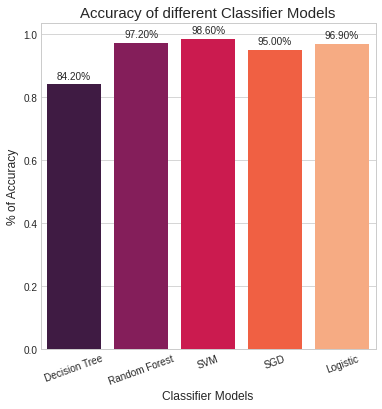

In [57]:
acc = [0.842, 0.972, 0.986, 0.950, 0.969]
models = ['Decision Tree', 'Random Forest', 'SVM', 'SGD', 'Logistic']

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize']=(6, 6) 
plt.style.use(['seaborn-whitegrid'])
ax = sns.barplot(x=models, y=acc, palette = "rocket", saturation =1.5)
plt.xlabel("Classifier Models", fontsize = 12 )
plt.ylabel("% of Accuracy", fontsize = 12)
plt.title("Accuracy of different Classifier Models", fontsize = 15)
plt.xticks(fontsize = 10, horizontalalignment = 'center', rotation = 20)
plt.yticks(fontsize = 10)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'medium')
plt.show()

## (5) 결론
Digits data는 손 글씨로 쓴 `0` 에서 `9`사이의 숫자를 분류하는 것이 목적

`0`, `6`, `9` 숫자를 손으로 쓸 경우 헷갈리기 쉽다고 판단하여 정확도와 `0`, `6`, `9`의 오분류가 가장 적은 모델을 찾으려고 함 

`Decision Tree` 모델은 정확도가 약 84%로 5개의 분류기 중 가장 낮은 정확도를 보임

가장 정확도가 높은 분류기는 `SVM` 모델이다. `6`과 `9`도 잘 분류된 것을 볼 수 있음

손글씨 데이터는 `SVM` 모델이 가장 분류를 잘 한다고 결론 내림

# Load Wine : 와인 분류

### (1), (2) Import the packages and load the datasets, preparing data

In [16]:
from sklearn.datasets import load_wine

wine = load_wine()
wine.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [17]:
wine_data = wine.data

wine_label = wine.target

print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [18]:
print(wine_data.shape)
print(wine_label.shape)

(178, 13)
(178,)


## (3) Data split

정답지 만들기

In [19]:
import pandas as pd
wine_df = pd.DataFrame(data = wine_data, columns = wine.feature_names)
wine_df['label'] = wine_label
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [20]:
X_train, X_test, y_train, y_test = train_test_split(wine_data, 
                                                   wine_label, 
                                                   test_size =  0.2,
                                                   random_state = 42)

print('X_train 개수 :', len(X_train), ', X_test 개수 :', len(X_test))

X_train 개수 : 142 , X_test 개수 : 36


## (4)다양한 모델로 학습시켜보기

### Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state = 42)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Decision Tree\'s accuracy : {:.3f}'.format(accuracy), '\n')

print('Decision Tree\'s report : \n\n', classification_report(y_test, y_pred), '\n')

print('Decision Tree\'s confusion matrix : \n\n',confusion_matrix(y_test, y_pred))

Decision Tree's accuracy : 0.944 

Decision Tree's report : 

               precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.93      1.00      0.97        14
           2       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.95      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36
 

Decision Tree's confusion matrix : 

 [[13  1  0]
 [ 0 14  0]
 [ 1  0  7]]


### Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state = 42)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Random Forest\'s accuracy : {:.3f}'.format(accuracy), '\n')

print('Random Forest\'s report : \n\n', classification_report(y_test, y_pred), '\n')

print('Random Forest\'s confusion matrix : \n\n',confusion_matrix(y_test, y_pred))

Random Forest's accuracy : 1.000 

Random Forest's report : 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36
 

Random Forest's confusion matrix : 

 [[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]


### Support Vector Machine

In [27]:
from sklearn import svm

svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('SVM\'s accuracy : {:.3f}'.format(accuracy), '\n')

print('SVM\'s report : \n\n', classification_report(y_test, y_pred), '\n')

print('SVM\'s confusion matrix : \n\n',confusion_matrix(y_test, y_pred))

SVM's accuracy : 0.806 

SVM's report : 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.73      0.79      0.76        14
           2       0.57      0.50      0.53         8

    accuracy                           0.81        36
   macro avg       0.77      0.76      0.76        36
weighted avg       0.80      0.81      0.80        36
 

SVM's confusion matrix : 

 [[14  0  0]
 [ 0 11  3]
 [ 0  4  4]]


### Stochastic Gradient Descent Classifier

In [26]:
from sklearn.linear_model import SGDClassifier

sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('SGD\'s accuracy : {:.3f}'.format(accuracy), '\n')

print('SGD\'s report : \n\n', classification_report(y_test, y_pred), '\n')

print('SGD\'s confusion matrix : \n\n',confusion_matrix(y_test, y_pred))

SGD's accuracy : 0.667 

SGD's report : 

               precision    recall  f1-score   support

           0       0.64      1.00      0.78        14
           1       0.71      0.71      0.71        14
           2       0.00      0.00      0.00         8

    accuracy                           0.67        36
   macro avg       0.45      0.57      0.50        36
weighted avg       0.53      0.67      0.58        36
 

SGD's confusion matrix : 

 [[14  0  0]
 [ 4 10  0]
 [ 4  4  0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('SVM\'s accuracy : {:.3f}'.format(accuracy), '\n')

print('SVM\'s report : \n\n', classification_report(y_test, y_pred), '\n')

print('SVM\'s confusion matrix : \n\n',confusion_matrix(y_test, y_pred))

SVM's accuracy : 0.972 

SVM's report : 

               precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.93      1.00      0.97        14
           2       1.00      1.00      1.00         8

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36
 

SVM's confusion matrix : 

 [[13  1  0]
 [ 0 14  0]
 [ 0  0  8]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


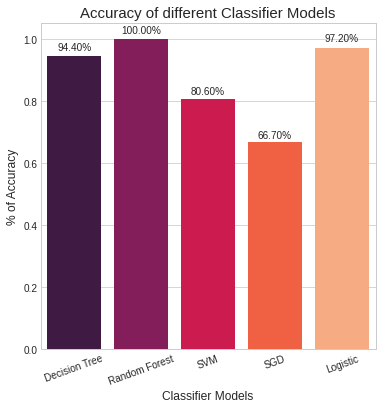

In [29]:
acc = [0.944, 1.00, 0.806, 0.667, 0.972]
models = ['Decision Tree', 'Random Forest', 'SVM', 'SGD', 'Logistic']

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize']=(6, 6) 
plt.style.use(['seaborn-whitegrid'])
ax = sns.barplot(x=models, y=acc, palette = "rocket", saturation =1.5)
plt.xlabel("Classifier Models", fontsize = 12 )
plt.ylabel("% of Accuracy", fontsize = 12)
plt.title("Accuracy of different Classifier Models", fontsize = 15)
plt.xticks(fontsize = 10, horizontalalignment = 'center', rotation = 20)
plt.yticks(fontsize = 10)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'medium')
plt.show()

### 결론
와인 데이터는 13개의 특징으로 3가지 종류의 와인을 분류하는 분류기 중 가장 정확하게 와인을 분류한 모델을 찾아야 함 

가장 정확도가 높은 `Random Forest`는 1.00의 정확도를 보여줌

`SVM`, `SGD`의 경우 낮은 정확도를 보이고 있음

여러개의 특성변수로 label해야하기 때문에 `Decision Tree`의 정확도가 높은 편에 속했고 `Decision Tree`의 앙상블 모델인 `Random Forest`가 가장 높은 정확도를 보임



# Load Breaest Cancer : 유방암 여부 진단

### (1), (2) Import the packages and load the datasets, preparing data

In [60]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [61]:
cancer_data = cancer.data

cancer_label = cancer.target

print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [62]:
print(cancer_data.shape)
print(cancer_label.shape)

(569, 30)
(569,)


## (3) Data split
모델 학습과 테스트용 문제지와 정답지 준비 

In [63]:
import pandas as pd
cancer_df = pd.DataFrame(data = cancer_data, columns = cancer.feature_names)
cancer_df['label'] = cancer_label
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [64]:
X_train, X_test, y_train, y_test = train_test_split(cancer_data, 
                                                   cancer_label, 
                                                   test_size =  0.2,
                                                   random_state = 42)

print('X_train 개수 :', len(X_train), ', X_test 개수 :', len(X_test))

X_train 개수 : 455 , X_test 개수 : 114


## (4) 다양한 모델로 학습시켜보기

### Decision Tree

In [70]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score

decision_tree = DecisionTreeClassifier(random_state = 42)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Decision Tree\'s accuracy : {:.3f}'.format(accuracy), '\n')

rescore = recall_score(y_test, y_pred)
print('Decision Tree\'s recall : {:.3f}'.format(rescore), '\n')

print('Decision Tree\'s report : \n\n', classification_report(y_test, y_pred), '\n')

print('Decision Tree\'s confusion matrix : \n\n',confusion_matrix(y_test, y_pred))

Decision Tree's accuracy : 0.947 

Decision Tree's recall : 0.958 

Decision Tree's report : 

               precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114
 

Decision Tree's confusion matrix : 

 [[40  3]
 [ 3 68]]


### Random Forest

In [72]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state = 42)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Random Forest\'s accuracy : {:.3f}'.format(accuracy), '\n')

rescore = recall_score(y_test, y_pred)
print('Random Forest\'s recall : {:.3f}'.format(rescore), '\n')

print('Random Forest\'s report : \n\n', classification_report(y_test, y_pred), '\n')

print('Random Forest\'s confusion matrix : \n\n',confusion_matrix(y_test, y_pred))

Random Forest's accuracy : 0.965 

Random Forest's recall : 0.986 

Random Forest's report : 

               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114
 

Random Forest's confusion matrix : 

 [[40  3]
 [ 1 70]]


### Supprot Vector Machine

In [73]:
from sklearn import svm

svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('SVM\'s accuracy : {:.3f}'.format(accuracy), '\n')

rescore = recall_score(y_test, y_pred)
print('SVM\'s recall : {:.3f}'.format(rescore), '\n')

print('SVM\'s report : \n\n', classification_report(y_test, y_pred), '\n')

print('SVM\'s confusion matrix : \n\n',confusion_matrix(y_test, y_pred))

SVM's accuracy : 0.947 

SVM's recall : 1.000 

SVM's report : 

               precision    recall  f1-score   support

           0       1.00      0.86      0.92        43
           1       0.92      1.00      0.96        71

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114
 

SVM's confusion matrix : 

 [[37  6]
 [ 0 71]]


### Stochastic Gradient Descent Classifier

In [74]:
from sklearn.linear_model import SGDClassifier

sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('SGD\'s accuracy : {:.3f}'.format(accuracy), '\n')

rescore = recall_score(y_test, y_pred)
print('SGD\'s recall : {:.3f}'.format(rescore), '\n')

print('SGD\'s report : \n\n', classification_report(y_test, y_pred), '\n')

print('SGD\'s confusion matrix : \n\n',confusion_matrix(y_test, y_pred))

SGD's accuracy : 0.956 

SGD's recall : 1.000 

SGD's report : 

               precision    recall  f1-score   support

           0       1.00      0.88      0.94        43
           1       0.93      1.00      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114
 

SGD's confusion matrix : 

 [[38  5]
 [ 0 71]]


### Logistic Regression

In [75]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Logistic\'s accuracy : {:.3f}'.format(accuracy), '\n')

rescore = recall_score(y_test, y_pred)
print('Logistic\'s recall : {:.3f}'.format(rescore), '\n')

print('Logistic\'s report : \n\n', classification_report(y_test, y_pred), '\n')

print('Logistic\'s confusion matrix : \n\n',confusion_matrix(y_test, y_pred))

Logistic's accuracy : 0.965 

Logistic's recall : 0.986 

Logistic's report : 

               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114
 

Logistic's confusion matrix : 

 [[40  3]
 [ 1 70]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


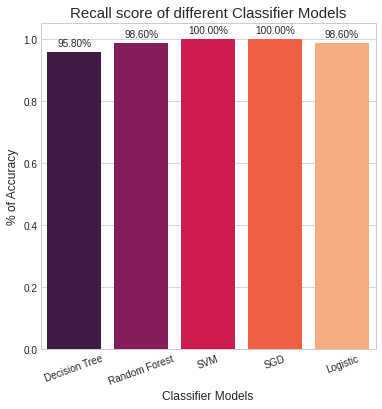

In [86]:
acc = [0.958, 0.986, 1.000, 1.000, 0.986]
models = ['Decision Tree', 'Random Forest', 'SVM', 'SGD', 'Logistic']

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 6))
plt.style.use(['seaborn-whitegrid'])
ax = sns.barplot(x=models, y=acc, palette = "rocket", saturation =1.5)
plt.xlabel("Classifier Models", fontsize = 12 )
plt.ylabel("% of Accuracy", fontsize = 12)
plt.title("Recall score of different Classifier Models", fontsize = 15)
plt.xticks(fontsize = 10, horizontalalignment = 'center', rotation = 20)
plt.yticks(fontsize = 10)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'medium')
plt.show()

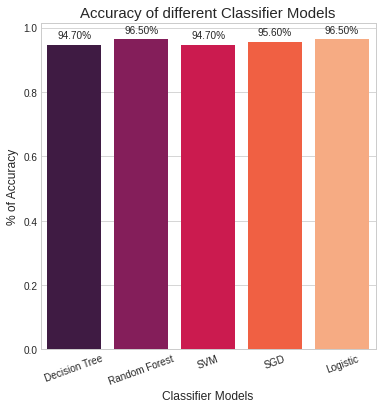

In [87]:
acc2 = [0.947, 0.965, 0.947, 0.956, 0.965]
models2 = ['Decision Tree', 'Random Forest', 'SVM', 'SGD', 'Logistic']

plt.figure(figsize=(6, 6))
plt.style.use(['seaborn-whitegrid'])
ax = sns.barplot(x=models2, y=acc2, palette = "rocket", saturation =1.5)
plt.xlabel("Classifier Models", fontsize = 12 )
plt.ylabel("% of Accuracy", fontsize = 12)
plt.title("Accuracy of different Classifier Models", fontsize = 15)
plt.xticks(fontsize = 10, horizontalalignment = 'center', rotation = 20)
plt.yticks(fontsize = 10)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'medium')
plt.show()

### 결론
유방암 여부 진단 데이터의 경우 암을 진단해야하기 때문에 실제 암에 결린 환자를 걸리지 않았다고 진단하면 안됨

양성을 음성으로 판단하면 안되기 때문에 `Recall Score`사용 

`SVM`과 `SGD`의 경우 `Recall Score`가 1.00으로 가장 높음 

두가지의 모델의 `Accuracy`를 보면 `SGD`가 조금 더 높은 것을 알 수 있음

유방암 여부 진단 데이터의 가장 좋은 모델은 `SGD`라고 판단